In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
import warnings
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns

In [94]:
df = pd.read_csv('customer_purchase_data.csv')
df.sample(5)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
746,60,0,105455.952682,2,4,44.872549,1,1,0
284,29,1,67976.892829,16,4,57.398287,0,3,1
1126,42,0,74762.246928,15,3,21.370609,0,2,0
814,34,0,37397.687190,3,1,10.656864,0,5,0
1295,69,0,32893.152946,15,1,56.190065,0,0,0


In [96]:
#EDA
df.PurchaseStatus.value_counts()

PurchaseStatus
0    852
1    648
Name: count, dtype: int64

In [98]:
df.dtypes

Age                     int64
Gender                  int64
AnnualIncome          float64
NumberOfPurchases       int64
ProductCategory         int64
TimeSpentOnWebsite    float64
LoyaltyProgram          int64
DiscountsAvailed        int64
PurchaseStatus          int64
dtype: object

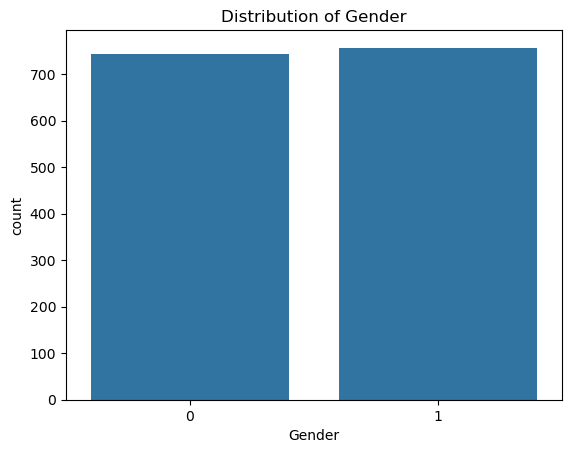

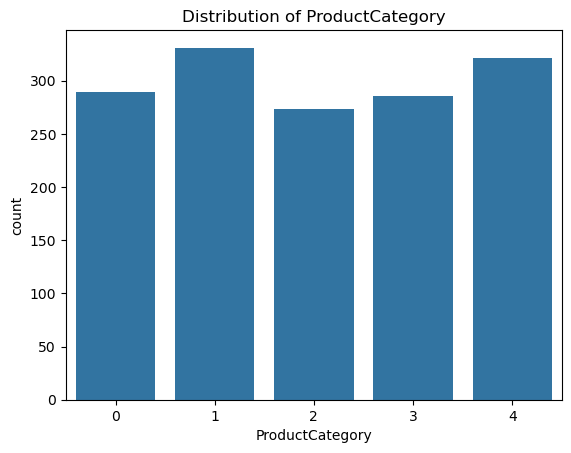

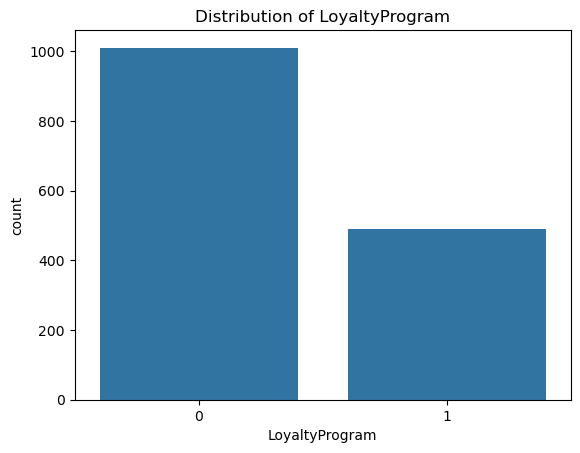

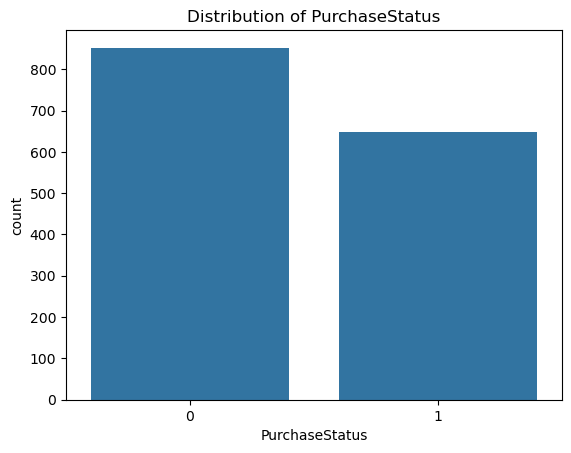

In [100]:

# Plotting the distribution of categorical features
categorical_features = ['Gender', 'ProductCategory', 'LoyaltyProgram', 'PurchaseStatus']
for feature in categorical_features:
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

In [101]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [104]:
df.duplicated().sum()

112

In [106]:
df.drop_duplicates()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [108]:
df.value_counts()

Age  Gender  AnnualIncome   NumberOfPurchases  ProductCategory  TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus
64   1       62207.870496   2                  0                41.937927           0               0                 0                 2
41   1       108740.238759  8                  1                37.698542           0               0                 0                 2
22   0       87622.086000   2                  1                24.942913           0               2                 0                 2
53   1       135718.347861  3                  2                43.738795           0               1                 0                 2
66   1       77089.476162   3                  4                51.093582           1               2                 0                 2
                                                                                                                                       ..
36   0       87788.373142   14         

In [110]:
Q1 = df['AnnualIncome'].quantile(0.25)
Q3 = df['AnnualIncome'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_AnnualIncome = df[(df['AnnualIncome']<lower_bound) | (df['AnnualIncome']>upper_bound)]
if Outliers_AnnualIncome.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ AnnualIncome")
else:
    print(Outliers_AnnualIncome['AnnualIncome'])

-43179.2113978119
213375.9634107995
ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ AnnualIncome


In [112]:
Q1 = df['NumberOfPurchases'].quantile(0.25)
Q3 = df['NumberOfPurchases'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_NumberOfPurchases = df[(df['NumberOfPurchases']<lower_bound) | (df['NumberOfPurchases']>upper_bound)]
if Outliers_NumberOfPurchases.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ NumberOfPurchases")
else:
    print(Outliers_NumberOfPurchases['NumberOfPurchases'])

-10.0
30.0
ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ NumberOfPurchases


In [121]:
Q1 = df['TimeSpentOnWebsite'].quantile(0.25)
Q3 = df['TimeSpentOnWebsite'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_TimeSpentOnWebsite = df[(df['TimeSpentOnWebsite']<lower_bound) | (df['TimeSpentOnWebsite']>upper_bound)]
if Outliers_TimeSpentOnWebsite.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ TimeSpentOnWebsite")
else:
    print(Outliers_TimeSpentOnWebsite['TimeSpentOnWebsited'])

-26.16304342243758
86.68960611494387
ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ TimeSpentOnWebsite


In [184]:
#x,y
x=df.drop('PurchaseStatus',axibs=1)
y=df['PurchaseStatus']

In [216]:
x.shape

(1500, 8)

In [230]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [232]:
x_train.shape

(1050, 8)

In [234]:
y_train.shape

(1050,)

In [236]:
y.value_counts()

PurchaseStatus
0    852
1    648
Name: count, dtype: int64

In [238]:
y_train.nunique()

2

In [240]:
IR = 852/648
print("ค่า Imbalance Ratio มีค่า = ",IR)

ค่า Imbalance Ratio มีค่า =  1.3148148148148149


In [242]:
# ปรับสมดุลข้อมูลด้วย SMOTETomek
smotetomek = SMOTETomek(random_state=42)
X_train_resampled,y_train_resampled = smotetomek.fit_resample(X_train, y_train)

In [244]:
X_train.shape

(1050, 8)

In [252]:
y_train_resampled.value_counts()

PurchaseStatus
1    468
0    468
Name: count, dtype: int64

(936, 8)

In [45]:
y_test.value_counts()

PurchaseStatus
0.0    256
1.0    194
Name: count, dtype: int64

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
# Prepare function for model evaluation
def evaluate_model(model_name, y_val, y_pred, y_prob):
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {auc:.4f}")
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return accuracy, precision, recall, auc

Confusion Matrix:
[[211  45]
 [ 25 169]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.82      0.86       256
         1.0       0.79      0.87      0.83       194

    accuracy                           0.84       450
   macro avg       0.84      0.85      0.84       450
weighted avg       0.85      0.84      0.85       450

Accuracy: 0.8444
Precision: 0.7897
Recall: 0.8711
AUC: 0.9323


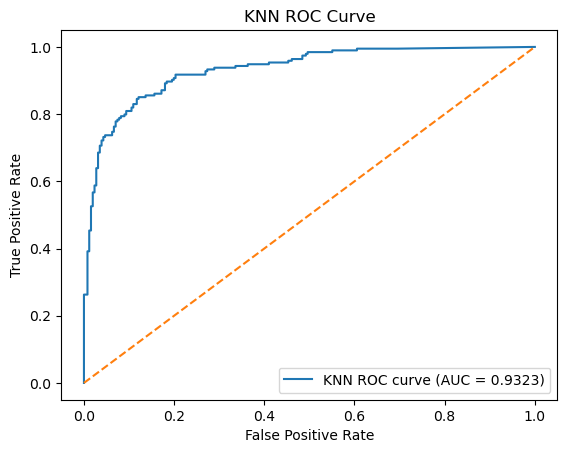

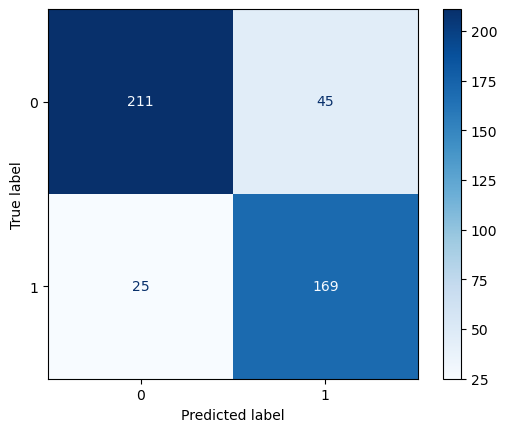

Best parameters found by GridSearchCV for KNN:
{'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}


In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Define the parameter grid for KNN
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9,],       # Number of neighbors to use
    'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'knn__metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create a pipeline to scale the data and apply KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Step to scale the data
    ('knn', KNeighborsClassifier())          # KNeighborsClassifier model
])

# GridSearchCV with pipeline for KNN
grid_search_knn = GridSearchCV(pipeline, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_knn.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate KNN
knn_best = grid_search_knn.best_estimator_
y_pred_knn = knn_best.predict(X_test)
y_prob_knn = knn_best.predict_proba(X_test)[:, 1]

# Print metrics (Assuming the same print_metrics function exists)
evaluate_model("KNN", y_test, y_pred_knn, y_prob_knn)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the best parameters for KNN
print("Best parameters found by GridSearchCV for KNN:")
print(grid_search_knn.best_params_)


Confusion Matrix:
[[220  36]
 [ 26 168]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88       256
         1.0       0.82      0.87      0.84       194

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450

Accuracy: 0.8622
Precision: 0.8235
Recall: 0.8660
AUC: 0.9359


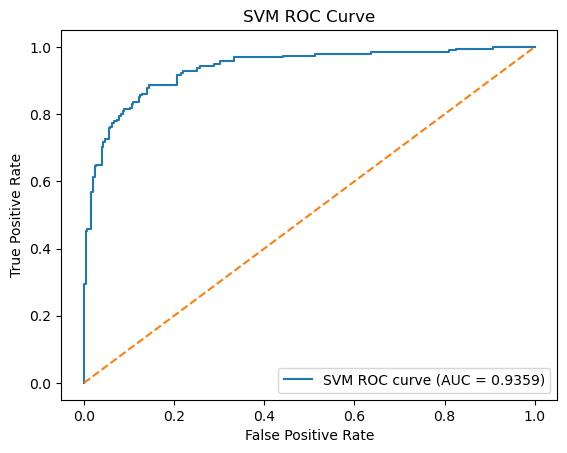

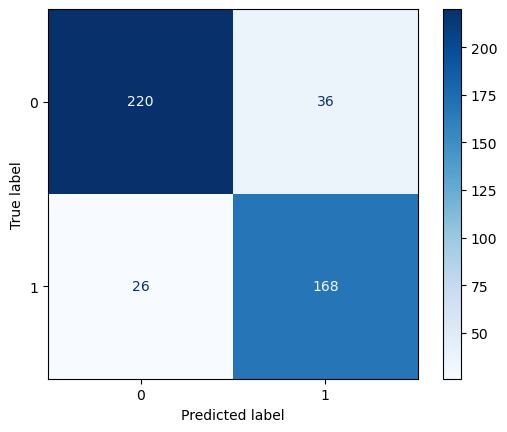

Best parameters found by GridSearchCV:
{'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [115]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid for SVM
param_grid_svm = {'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 'auto'], 'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a pipeline to scale the data and apply SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('svc', SVC(probability=True))  # SVC model with probability=True
])

# GridSearchCV with pipeline
grid_search_svm = GridSearchCV(pipeline, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_svm.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate SVM
svm_best = grid_search_svm.best_estimator_
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:, 1]

# Print metrics
evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search_svm.best_params_)

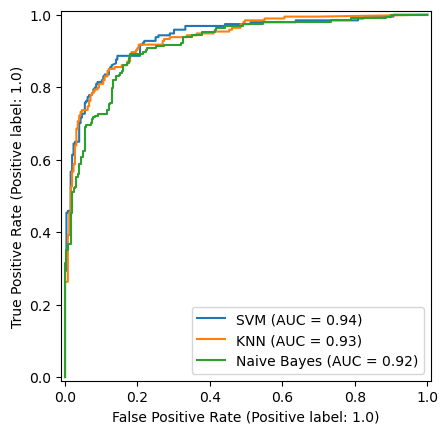

In [102]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# สร้าง ROC curve สำหรับ SVM (model_1) และตั้งเป็นกราฟพื้นฐาน
plt_1 = RocCurveDisplay.from_estimator(svm_best, X_test, y_test, name='SVM')

# เพิ่ม ROC curve ของ KNN (model_2) ในกราฟเดียวกัน
RocCurveDisplay.from_estimator(knn_best, X_test, y_test, ax=plt_1.ax_, name='KNN')

# เพิ่ม ROC curve ของ Naive Bayes (model_3) ในกราฟเดียวกัน
RocCurveDisplay.from_estimator(nb_best, X_test, y_test, ax=plt_1.ax_, name='Naive Bayes')

# แสดงผลกราฟ
plt.show()


Confusion Matrix:
[[220  36]
 [ 26 168]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88       256
         1.0       0.82      0.87      0.84       194

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450

Accuracy: 0.8622
Precision: 0.8235
Recall: 0.8660
AUC: 0.9359


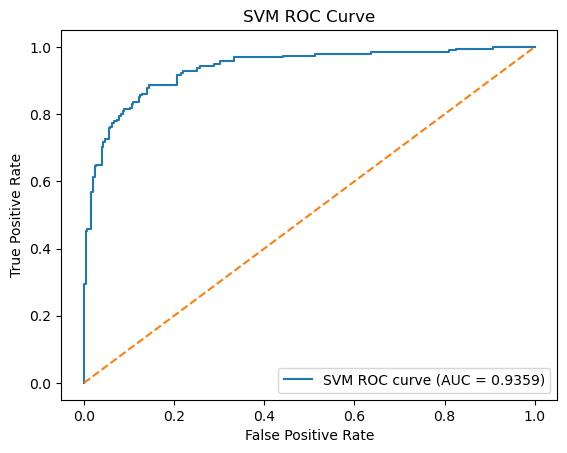

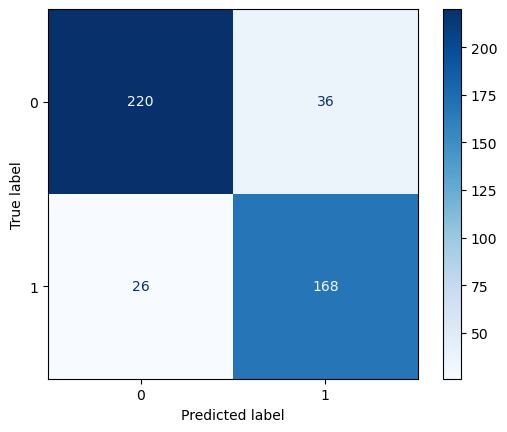

Best parameters found by GridSearchCV:
{'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [117]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid for SVM
param_grid_svm = {'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 'auto'], 'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a pipeline to scale the data and apply SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('svc', SVC(probability=True))  # SVC model with probability=True
])

# GridSearchCV with pipeline
grid_search_svm = GridSearchCV(pipeline, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_svm.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate SVM
svm_best = grid_search_svm.best_estimator_
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:, 1]

# Print metrics
evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search_svm.best_params_)

Confusion Matrix:
[[212  44]
 [ 27 167]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86       256
         1.0       0.79      0.86      0.82       194

    accuracy                           0.84       450
   macro avg       0.84      0.84      0.84       450
weighted avg       0.85      0.84      0.84       450

Accuracy: 0.8422
Precision: 0.7915
Recall: 0.8608
AUC: 0.9157


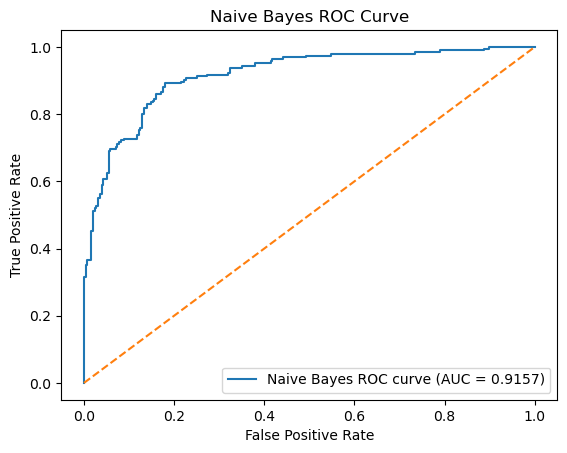

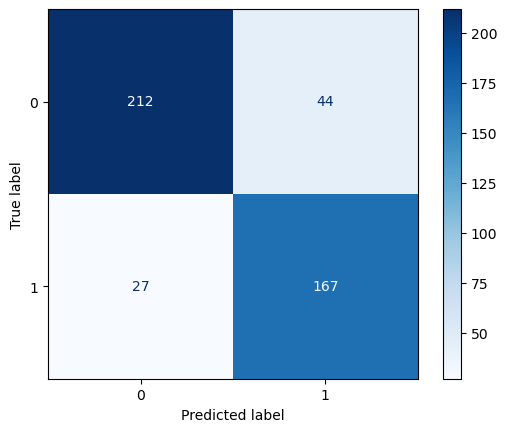

In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Since GaussianNB does not have many hyperparameters to tune, we will just fit it in the pipeline
param_grid_nb = {}

# Create a pipeline to scale the data and apply GaussianNB
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('nb', GaussianNB())            # GaussianNB model
])

# GridSearchCV with pipeline (no parameter grid for Naive Bayes)
grid_search_nb = GridSearchCV(pipeline, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_nb.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate Naive Bayes
nb_best = grid_search_nb.best_estimator_
y_pred_nb = nb_best.predict(X_test)
y_prob_nb = nb_best.predict_proba(X_test)[:, 1]

# Print metrics (Assuming the same print_metrics function exists)
evaluate_model("Naive Bayes", y_test, y_pred_nb, y_prob_nb)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

In [103]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Function to evaluate and collect metrics
def evaluate_and_collect_metrics(model, X_val, y_val):
    # Get predictions and prediction probabilities
    y_pred = model.predict(X_val)
    
    # Check if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        auc_score = roc_auc_score(y_val, y_pred_proba)
    else:
        auc_score = None
    
    # Collect metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    return {
        'Accuracy': accuracy,
        'AUC': auc_score,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Define models you want to evaluate
models = {
    'SVM': svm_best,           # Assume svm_best is the best SVM model
    'KNN': knn_best,           # Assume knn_best is the best KNN model
    'Naive Bayes': nb_best     # Assume nb_best is the best Naive Bayes model
}

# Create a dataframe to store the results
results = pd.DataFrame(columns=['Accuracy', 'AUC', 'Precision', 'Recall', 'F1-Score'])

# Evaluate each model and collect the results
for model_name, model in models.items():
    metrics = evaluate_and_collect_metrics(model, X_test, y_test)
    results.loc[model_name] = metrics

# Print the results
print(results)


             Accuracy       AUC  Precision    Recall  F1-Score
SVM          0.862222  0.935940   0.823529  0.865979  0.844221
KNN          0.844444  0.932345   0.789720  0.871134  0.828431
Naive Bayes  0.842222  0.915653   0.791469  0.860825  0.824691
